# Part 3: Binary Text Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Latent-Dirichlet-Allocation-(LDA)" data-toc-modified-id="Latent-Dirichlet-Allocation-(LDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Latent Dirichlet Allocation (LDA)</a></span><ul class="toc-item"><li><span><a href="#Generating-Text-Features-using-LDA" data-toc-modified-id="Generating-Text-Features-using-LDA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generating Text Features using LDA</a></span></li><li><span><a href="#Displaying-Document-Term-Matrix" data-toc-modified-id="Displaying-Document-Term-Matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Displaying Document Term Matrix</a></span></li><li><span><a href="#Generating-Topic-Weights-along-w/-Dominant-Topic-for-each-Document" data-toc-modified-id="Generating-Topic-Weights-along-w/-Dominant-Topic-for-each-Document-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Generating Topic Weights along w/ Dominant Topic for each Document</a></span></li></ul></li><li><span><a href="#Mini-Batch-K-Means-Clustering" data-toc-modified-id="Mini-Batch-K-Means-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mini Batch K-Means Clustering</a></span></li><li><span><a href="#Supervised-Learning" data-toc-modified-id="Supervised-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Supervised Learning</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Generating-Training-and-Test-Dataset" data-toc-modified-id="Generating-Training-and-Test-Dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Generating Training and Test Dataset</a></span></li><li><span><a href="#Using-Logistic-Regression-for-Training" data-toc-modified-id="Using-Logistic-Regression-for-Training-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Using Logistic Regression for Training</a></span></li><li><span><a href="#Cross-Validation-Scores-with-a-Set-of-Models" data-toc-modified-id="Cross-Validation-Scores-with-a-Set-of-Models-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Cross Validation Scores with a Set of Models</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import os
import copy
import pickle 
import time
import gensim
import operator
import string 
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize, sent_tokenize, word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn import svm
from gensim import corpora, models, similarities, matutils
from mpl_toolkits import mplot3d
import gensim.downloader as api
import svdRec
import spacy
from functools import reduce
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.decomposition import LatentDirichletAllocation as LDA
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim import corpora
from nltk.corpus import stopwords
nltk.download('stopwords')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
from gensim.models import LdaModel
from nltk import word_tokenize, pos_tag
from gensim.models import CoherenceModel
import pyLDAvis.sklearn
import matplotlib.colors as mcolors
from collections import Counter
nltk.download('averaged_perceptron_tagger')
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline
sys.setrecursionlimit(2*10**6) 

import warnings
warnings.filterwarnings('ignore');

[nltk_data] Downloading package punkt to /Users/chaudhary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaudhary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chaudhary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chaudhary/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


__Obtaining Binary Labels From Kaggle Dataset:__

In [77]:
# Reading Kaggle Dataset
kaggle_data = pd.read_csv('../train.csv')

In [78]:
kaggle_comments_complete_list_binarylabels = []

for i in range(len(kaggle_data['comment_text'])):
    if (kaggle_data['toxic'][i] == 1) or (kaggle_data['severe_toxic'][i] == 1) or (kaggle_data['obscene'][i] == 1) or (kaggle_data['threat'][i] == 1) or (kaggle_data['insult'][i] == 1) or (kaggle_data['identity_hate'][i] == 1):
        kaggle_comments_complete_list_binarylabels.append(1)
    else:
        kaggle_comments_complete_list_binarylabels.append(0)

__Loading Clean (Lemmatized) Kaggle Dataset:__

In [79]:
kaggle_comments_complete_lemmatized_nouns_adj_df = pd.read_csv(r'../kaggle_comments_complete_lemmatized_nouns_adj.csv')

In [80]:
kaggle_comments_complete_lemmatized_nouns_adj_df = kaggle_comments_complete_lemmatized_nouns_adj_df.drop(columns = ['Unnamed: 0'])
kaggle_comments_complete_lemmatized_nouns_adj_df.head()

,comments
0,explanation edit make username hardcore metall...
1,match background thank talk january utc
2,hey man edit war guy relevant information talk...
3,real suggestion improvement section statistic ...
4,sir hero chance page


__Converting Comments in DataFrame to List:__

In [81]:
kaggle_comments_complete_lemmatized_nouns_adj = kaggle_comments_complete_lemmatized_nouns_adj_df.values.tolist()

In [82]:
kaggle_comments_list = kaggle_comments_complete_lemmatized_nouns_adj_df['comments'].astype(str).tolist()

## Latent Dirichlet Allocation (LDA)

### Generating Text Features using LDA

In [164]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,          
                            )

data_vectorized = vectorizer.fit_transform(kaggle_comments_list)

lda_model = LatentDirichletAllocation(n_components=7, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

### Displaying Document Term Matrix

In [165]:
"""
"show_topics" function: Displays a given number of topics containing top n_words. 
It utilizes LDA model as generated above.
"""
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,http,claim,fact,com,clear,true,www,wiki,org,person,write,site,news,report,man,matter,day,truth,cite,post
Topic 1,source,image,use,article,link,page,wikipedia,list,information,reference,copyright,thank,reliable,fair,title,review,picture,medium,text,file
Topic 2,good,time,article,change,year,way,work,utc,new,thing,don,old,sorry,list,look,people,version,lol,line,school
Topic 3,fuck,block,don,people,attack,suck,thing,day,personal,guy,didn,admin,bad,hate,time,stop,make,jew,wrong,gay
Topic 4,category,american,redirect,style,ass,city,color,film,white,aid,background,freedom,united,team,christian,live,country,shit,album,new
Topic 5,article,people,state,section,word,fact,war,use,point,term,history,book,language,statement,different,reference,example,mention,group,sentence
Topic 6,page,article,talk,edit,wikipedia,user,thank,editor,deletion,discussion,comment,question,help,delete,policy,welcome,revert,place,request,content


### Generating Topic Weights along w/ Dominant Topic for each Document

In [166]:
lda_output = lda_model.transform(data_vectorized)

# Column names
topicnames = df_topic_keywords.T.columns

# Index names
docnames = ["Doc" + str(i) for i in range(len(kaggle_comments_complete_lemmatized_nouns_adj_df))]

# Generate pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(kaggle_comments_complete_lemmatized_nouns_adj_df, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

df_topic_theme = df_sent_topic[['comments', 'dominant_topic']]
df_topic_theme.head(10)
df_sent_topic[:20]

,comments,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,dominant_topic
0,explanation edit make username hardcore metall...,0.01,0.01,0.07,0.44,0.01,0.01,0.46,6
1,match background thank talk january utc,0.02,0.02,0.17,0.02,0.44,0.02,0.31,4
2,hey man edit war guy relevant information talk...,0.01,0.01,0.01,0.30,0.01,0.26,0.40,6
3,real suggestion improvement section statistic ...,0.00,0.15,0.00,0.44,0.00,0.12,0.27,3
4,sir hero chance page,0.03,0.03,0.03,0.23,0.23,0.03,0.43,6
5,congratulation tool · talk,0.04,0.04,0.04,0.04,0.04,0.04,0.79,6
6,cocksucker piss work,0.58,0.04,0.24,0.04,0.04,0.04,0.04,0
7,vandalism matt shirvington article please don,0.03,0.26,0.03,0.03,0.03,0.03,0.59,6
8,word nonsense offensive anything article wow v...,0.01,0.09,0.11,0.53,0.01,0.01,0.25,3
9,alignment subject dulithgow,0.07,0.07,0.07,0.07,0.07,0.07,0.57,6


## Mini Batch K-Means Clustering

In [167]:
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit(kaggle_comments_list)
features = vec.transform(kaggle_comments_list)

In [168]:
cls = MiniBatchKMeans(n_clusters=7, random_state = 0)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=7, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [169]:
kmeans_labels = cls.predict(features)

In [170]:
df_document_topic['cluster'] = kmeans_labels

In [171]:
df_document_topic = df_document_topic.drop(columns = ["index"])

In [172]:
df_classification_topic= pd.merge(kaggle_comments_complete_lemmatized_nouns_adj_df, df_document_topic, left_index=True, right_index=True)
df_classification_topic.head()

,comments,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,dominant_topic,cluster
0,explanation edit make username hardcore metall...,0.01,0.01,0.07,0.44,0.01,0.01,0.46,6,2
1,match background thank talk january utc,0.02,0.02,0.17,0.02,0.44,0.02,0.31,4,3
2,hey man edit war guy relevant information talk...,0.01,0.01,0.01,0.30,0.01,0.26,0.40,6,2
3,real suggestion improvement section statistic ...,0.00,0.15,0.00,0.44,0.00,0.12,0.27,3,0
4,sir hero chance page,0.03,0.03,0.03,0.23,0.23,0.03,0.43,6,3


## Supervised Learning

### Feature Engineering

__Getting Word Length of each Document in the Corpus:__

In [173]:
df_classification_topic['word_length'] = df_classification_topic['comments'].str.split().str.len()
df_classification_topic

,comments,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,dominant_topic,cluster,word_length
0,explanation edit make username hardcore metall...,0.01,0.01,0.07,0.44,0.01,0.01,0.46,6,2,20.0
1,match background thank talk january utc,0.02,0.02,0.17,0.02,0.44,0.02,0.31,4,3,6.0
2,hey man edit war guy relevant information talk...,0.01,0.01,0.01,0.30,0.01,0.26,0.40,6,2,15.0
3,real suggestion improvement section statistic ...,0.00,0.15,0.00,0.44,0.00,0.12,0.27,3,0,35.0
4,sir hero chance page,0.03,0.03,0.03,0.23,0.23,0.03,0.43,6,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...
159566,second time ask view coverage reliable source ...,0.01,0.28,0.39,0.01,0.01,0.29,0.01,2,0,17.0
159567,horrible thing talk page,0.03,0.03,0.03,0.42,0.03,0.03,0.43,6,3,4.0
159568,spitzer umm actual article prostitution crunch...,0.19,0.02,0.25,0.19,0.02,0.30,0.02,5,4,7.0
159569,speedy first version delete look,0.03,0.03,0.37,0.03,0.03,0.03,0.48,6,4,5.0


__Generating Dummy Variables for above Clusters:__

In [174]:
dummy = pd.get_dummies(df_classification_topic['cluster'])
dummy

,0,1,2,3,4,5,6
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
159566,1,0,0,0,0,0,0
159567,0,0,0,1,0,0,0
159568,0,0,0,0,1,0,0
159569,0,0,0,0,1,0,0


In [175]:
df_classification_topic = df_classification_topic.drop(columns = ['comments','dominant_topic','cluster'])

In [176]:
df_classification_topic

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,word_length
0,0.01,0.01,0.07,0.44,0.01,0.01,0.46,20.0
1,0.02,0.02,0.17,0.02,0.44,0.02,0.31,6.0
2,0.01,0.01,0.01,0.30,0.01,0.26,0.40,15.0
3,0.00,0.15,0.00,0.44,0.00,0.12,0.27,35.0
4,0.03,0.03,0.03,0.23,0.23,0.03,0.43,4.0
...,...,...,...,...,...,...,...,...
159566,0.01,0.28,0.39,0.01,0.01,0.29,0.01,17.0
159567,0.03,0.03,0.03,0.42,0.03,0.03,0.43,4.0
159568,0.19,0.02,0.25,0.19,0.02,0.30,0.02,7.0
159569,0.03,0.03,0.37,0.03,0.03,0.03,0.48,5.0


__Scaling Features Dataframe:__

In [177]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_classification_topic)

In [178]:
scaled_df = pd.DataFrame(scaled_df, columns=['Topic: 0', 'Topic: 1', 'Topic: 2', 'Topic: 3', 'Topic: 4', 'Topic: 5', 'Topic: 6', 'word_length'])


In [179]:
scaled_df

,Topic: 0,Topic: 1,Topic: 2,Topic: 3,Topic: 4,Topic: 5,Topic: 6,word_length
0,-0.762467,-0.627892,-0.609226,1.885197,-0.591981,-0.859816,0.929082,-0.119623
1,-0.688629,-0.560704,-0.050650,-0.647070,3.458315,-0.806503,0.312318,-0.466441
2,-0.762467,-0.627892,-0.944372,1.041108,-0.591981,0.473002,0.682376,-0.243487
3,-0.836304,0.312746,-1.000230,1.885197,-0.686174,-0.273376,0.147847,0.251968
4,-0.614792,-0.493515,-0.832657,0.619063,1.480264,-0.753191,0.805729,-0.515987
...,...,...,...,...,...,...,...,...
159566,-0.762467,1.186197,1.178217,-0.707363,-0.591981,0.632940,-0.921211,-0.193941
159567,-0.614792,-0.493515,-0.832657,1.764613,-0.403595,-0.753191,0.805729,-0.515987
159568,0.566608,-0.560704,0.396211,0.377895,-0.497788,0.686253,-0.880094,-0.441669
159569,-0.614792,-0.493515,1.066502,-0.586778,-0.403595,-0.753191,1.011317,-0.491214


__Merging Cluster Dummy Variables with Features Dataframe:__

In [180]:
scaled_df = pd.merge(scaled_df, dummy, left_index=True, right_index=True)

In [181]:
scaled_df = pd.merge(scaled_df, kaggle_comments_list_df['label'], left_index=True, right_index=True)

In [182]:
scaled_df

,Topic: 0,Topic: 1,Topic: 2,Topic: 3,Topic: 4,Topic: 5,Topic: 6,word_length,0,1,2,3,4,5,6,label
0,-0.762467,-0.627892,-0.609226,1.885197,-0.591981,-0.859816,0.929082,-0.119623,0,0,1,0,0,0,0,0
1,-0.688629,-0.560704,-0.050650,-0.647070,3.458315,-0.806503,0.312318,-0.466441,0,0,0,1,0,0,0,0
2,-0.762467,-0.627892,-0.944372,1.041108,-0.591981,0.473002,0.682376,-0.243487,0,0,1,0,0,0,0,0
3,-0.836304,0.312746,-1.000230,1.885197,-0.686174,-0.273376,0.147847,0.251968,1,0,0,0,0,0,0,0
4,-0.614792,-0.493515,-0.832657,0.619063,1.480264,-0.753191,0.805729,-0.515987,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,-0.762467,1.186197,1.178217,-0.707363,-0.591981,0.632940,-0.921211,-0.193941,1,0,0,0,0,0,0,0
159567,-0.614792,-0.493515,-0.832657,1.764613,-0.403595,-0.753191,0.805729,-0.515987,0,0,0,1,0,0,0,0
159568,0.566608,-0.560704,0.396211,0.377895,-0.497788,0.686253,-0.880094,-0.441669,0,0,0,0,1,0,0,0
159569,-0.614792,-0.493515,1.066502,-0.586778,-0.403595,-0.753191,1.011317,-0.491214,0,0,0,0,1,0,0,0


__Checking for any null values:__

In [183]:
scaled_df.isnull().any()

Topic: 0       False
Topic: 1       False
Topic: 2       False
Topic: 3       False
Topic: 4       False
Topic: 5       False
Topic: 6       False
word_length     True
0              False
1              False
2              False
3              False
4              False
5              False
6              False
label          False
dtype: bool

__Dropping any null values:__

In [184]:
scaled_df_classification = scaled_df.dropna()

In [185]:
scaled_df_classification.isnull().any()

Topic: 0       False
Topic: 1       False
Topic: 2       False
Topic: 3       False
Topic: 4       False
Topic: 5       False
Topic: 6       False
word_length    False
0              False
1              False
2              False
3              False
4              False
5              False
6              False
label          False
dtype: bool

In [187]:
scaled_df_classification[0] = scaled_df_classification[0].astype(float)
scaled_df_classification[1] = scaled_df_classification[1].astype(float)
scaled_df_classification[2] = scaled_df_classification[2].astype(float)
scaled_df_classification[3] = scaled_df_classification[3].astype(float)
scaled_df_classification[4] = scaled_df_classification[4].astype(float)
scaled_df_classification[5] = scaled_df_classification[5].astype(float)

__Removing Label Columns to have features only Dataframe:__

In [189]:
scaled_df_classification_nolabel = scaled_df_classification.drop(columns = ['label'])

In [190]:
scaled_df_classification_nolabel

,Topic: 0,Topic: 1,Topic: 2,Topic: 3,Topic: 4,Topic: 5,Topic: 6,word_length,0,1,2,3,4,5,6
0,-0.762467,-0.627892,-0.609226,1.885197,-0.591981,-0.859816,0.929082,-0.119623,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.688629,-0.560704,-0.050650,-0.647070,3.458315,-0.806503,0.312318,-0.466441,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.762467,-0.627892,-0.944372,1.041108,-0.591981,0.473002,0.682376,-0.243487,0.0,0.0,1.0,0.0,0.0,0.0,0
3,-0.836304,0.312746,-1.000230,1.885197,-0.686174,-0.273376,0.147847,0.251968,1.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.614792,-0.493515,-0.832657,0.619063,1.480264,-0.753191,0.805729,-0.515987,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,-0.762467,1.186197,1.178217,-0.707363,-0.591981,0.632940,-0.921211,-0.193941,1.0,0.0,0.0,0.0,0.0,0.0,0
159567,-0.614792,-0.493515,-0.832657,1.764613,-0.403595,-0.753191,0.805729,-0.515987,0.0,0.0,0.0,1.0,0.0,0.0,0
159568,0.566608,-0.560704,0.396211,0.377895,-0.497788,0.686253,-0.880094,-0.441669,0.0,0.0,0.0,0.0,1.0,0.0,0
159569,-0.614792,-0.493515,1.066502,-0.586778,-0.403595,-0.753191,1.011317,-0.491214,0.0,0.0,0.0,0.0,1.0,0.0,0


### Generating Training and Test Dataset

In [191]:
X = pd.DataFrame(scaled_df_classification_nolabel)

In [192]:
y = scaled_df_classification['label']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=123)

In [194]:
y_train.dtypes

dtype('int64')

### Using Logistic Regression for Training

In [195]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
LR.score(X_train, y_train)

0.9029950786781707

### Cross Validation Scores with a Set of Models

In [197]:
# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(C=3.6)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
models.append(('DT', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(n_estimators=261,max_depth=29)))
models.append(('NB', GaussianNB()))

LR: 0.902941 (0.003041)
LDA: 0.895483 (0.002463)
KNN: 0.900890 (0.003781)
DT: 0.902626 (0.003260)
RF: 0.899990 (0.002612)
NB: 0.549110 (0.012394)


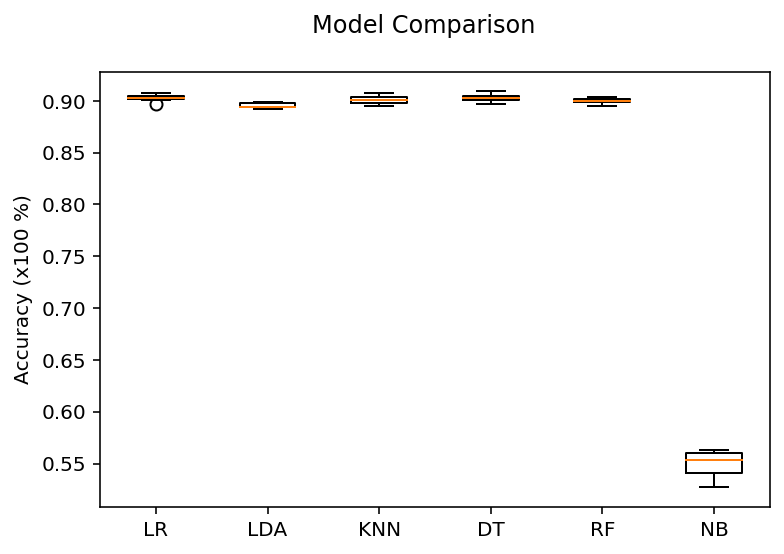

In [198]:
scoring    = "accuracy"

accuracy_list_binary = []
accuracy_results = []
accuracy_names   = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    accuracy_results.append(cv_results)
    accuracy_names.append(name)
    accuracy_list_binary.append(cv_results.mean())
    status = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(status)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(accuracy_results)
ax.set_xticklabels(accuracy_names)
plt.ylabel("Accuracy (x100 %)")
plt.show()

In [202]:
# Predict the response for test dataset
y_pred = LR.predict(X_test)

print("Binary Classification Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print("Binary Classification Precision:",round(metrics.precision_score(y_test, y_pred)*100,2),'%')

Binary Classification Accuracy: 89.89 %
Binary Classification Precision: 54.56 %


### Confusion Matrix

In [203]:
"""
"make_confusion_matrix" function: Generates confusion matrix 
"""
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    binary_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(binary_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.autoscale()

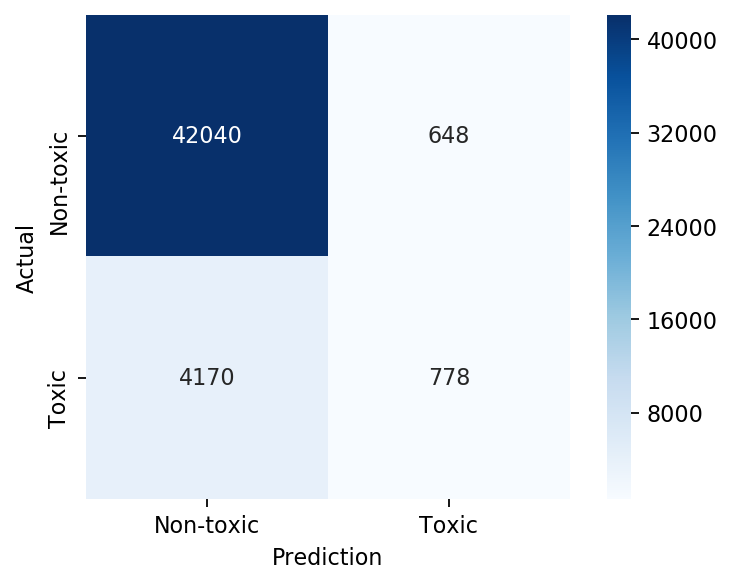

In [204]:
make_confusion_matrix(LR)
plt.savefig('confusionmatrix_nlp.png',dpi=600)

## Conclusion

In summary, we were able to demonstrate that starting from a raw text data or corpus, a significant amount of data cleaning was necessary to see any decent topics. In essence, the topics are coherent (coherence score: 0.8) enough to attribute different levels of toxicity to a given document. This can be significantly improved with further data preprocessing, i.e., inclusion of misspelled words and abbreviations. Importantly, the weight matrices from the topic modleing can be used as features to perform supervised learning using Logistic Regression model. The accuracy score is 90% (precision score: 54%), but given that the dataset is imbalanced, further analysis/optimization is required to improve the precision and recall scores. 

## References

[1] https://towardsdatascience.com/topic-modeling-quora-questions-with-lda-nmf-aff8dce5e1dd

[2] https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python

[3] https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52